In [11]:
# General libraries
import numpy as np
import pandas as pd
import random
import cv2
import os
import matplotlib.pyplot as plt

# Deep learning libraries
#import keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

#Util Component 1: Confusion matrix report/Accuracy measures
from sklearn.metrics import accuracy_score, confusion_matrix

# disabling warnings
import logging
logging.getLogger('tensorflow').disabled = True #Jordan_note: Disable red warning lines seen at model architecture creation.

In [12]:
train_dir="/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato/train"
test_dir="/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato/val"

In [13]:
classes_train=os.listdir(train_dir)
classes_test=os.listdir(test_dir)
classes_train

['Tomato___Early_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Bacterial_spot',
 'Tomato___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [14]:
train_idg=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1 #Shear angle in counter-clockwise direction in degrees
)
train_flow=train_idg.flow_from_directory(
    train_dir,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    target_size=(256,256)
)

Found 10000 images belonging to 10 classes.


In [15]:
# Second for Testing data
test_idg=ImageDataGenerator(
    rescale=1.0/255.0
)
test_flow=test_idg.flow_from_directory(
    test_dir,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=64,
    target_size=(256,256)
)

Found 984 images belonging to 10 classes.


In [16]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

In [21]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(10,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 84, 84, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 82, 82, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)       

In [23]:
callbacks=[earlystop,learning_rate_reduction]

In [32]:
model.fit(
    train_flow,
    epochs=50,
    validation_data=test_flow,
    callbacks=callbacks

)

Epoch 1/50
157/157 [==============================] - 158s 1s/step - loss: 0.1081 - accuracy: 0.7969 - val_loss: 0.1578 - val_accuracy: 0.7744 - lr: 0.0010
Epoch 2/50
157/157 [==============================] - 157s 999ms/step - loss: 0.0998 - accuracy: 0.8242 - val_loss: 0.1253 - val_accuracy: 0.8242 - lr: 0.0010
Epoch 3/50
157/157 [==============================] - 157s 998ms/step - loss: 0.0990 - accuracy: 0.8274 - val_loss: 0.1064 - val_accuracy: 0.8364 - lr: 0.0010
Epoch 4/50
157/157 [==============================] - 198s 1s/step - loss: 0.0935 - accuracy: 0.8381 - val_loss: 0.1812 - val_accuracy: 0.7856 - lr: 0.0010
Epoch 5/50
157/157 [==============================] - 164s 1s/step - loss: 0.0903 - accuracy: 0.8418 - val_loss: 0.2057 - val_accuracy: 0.7703 - lr: 0.0010
Epoch 6/50
157/157 [==============================] - 158s 1s/step - loss: 0.0897 - accuracy: 0.8417 - val_loss: 0.1516 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 7/50
157/157 [==============================] - 155s

In [33]:
losses=pd.DataFrame(model.history.history)

In [34]:
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.108087,0.7969,0.157750,0.774390,0.001
1,0.099794,0.8242,0.125262,0.824187,0.001
2,0.098993,0.8274,0.106407,0.836382,0.001
3,0.093470,0.8381,0.181236,0.785569,0.001
4,0.090341,0.8418,0.205681,0.770325,0.001


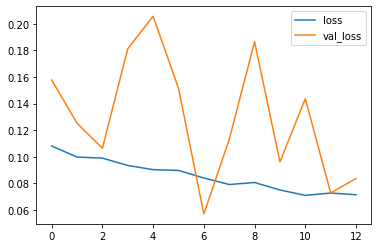

In [35]:
losses[['loss','val_loss']].plot()

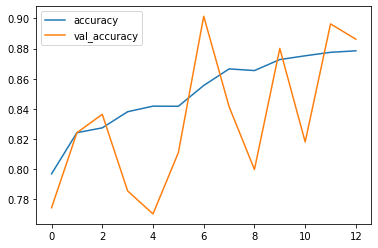

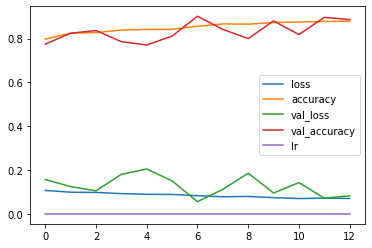

In [36]:
losses[['accuracy','val_accuracy']].plot()
losses.plot()

In [37]:
model_pred=model.predict(test_flow)

In [38]:
#testing the CNN model
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_flow)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating model accuracy
16/16 [==============================] - 3s 201ms/step - loss: 0.0837 - accuracy: 0.8862
Test Accuracy: 88.62%
